In [1]:
from glob import glob
import sys
import getpass
import os
from os.path import join, dirname, getsize
import pickle
import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.stats.multitest
# from statsmodels.sandbox.stats.multicomp import multipletests

import nilearn

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_validate, GroupKFold
from sklearn.preprocessing import StandardScaler
# from sklearn.svm import LinearSVC

# import mydef as my Class correction for projects
import mydef

/usr/local/anaconda3/envs/sampark/lib/python3.7/site-packages/nilearn/datasets/__init__.py:90: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)


In [2]:
GA = mydef.GA()

OS : darwin
Google Drive is detected!
Git directory is detected!


## 1. ROI list

In [3]:
## initalizing
GA.roi_imgs = {}

1. Localizer

In [3]:
suffix = '7localizers'
path_list = sorted(glob(join(GA.dir_mask,'localizer','n200_*.nii')))
for path in path_list:
    roi = path.split('/')[-1].replace('_mask.nii', '')
    GA.roi_imgs[roi] = nilearn.image.load_img(path)
GA.roi_imgs

{'n200_c1-1_L_M1': <nibabel.nifti1.Nifti1Image at 0x7fce00d4c8d0>,
 'n200_c1-2_L_S1': <nibabel.nifti1.Nifti1Image at 0x7fce01f64850>,
 'n200_c1_L_Postcentral': <nibabel.nifti1.Nifti1Image at 0x7fce01f649d0>,
 'n200_c1_R_SPL': <nibabel.nifti1.Nifti1Image at 0x7fce01f64c10>,
 'n200_c2_R_CerebellumIV-V': <nibabel.nifti1.Nifti1Image at 0x7fce01f64dd0>,
 'n200_c2_R_MFG': <nibabel.nifti1.Nifti1Image at 0x7fce01f64f90>,
 'n200_c3_R_MTG': <nibabel.nifti1.Nifti1Image at 0x7fce01f7a250>,
 'n200_c3_R_Postcentral': <nibabel.nifti1.Nifti1Image at 0x7fce01f7a450>,
 'n200_c4_L_IFG': <nibabel.nifti1.Nifti1Image at 0x7fce01f7a690>,
 'n200_c4_L_Putamen': <nibabel.nifti1.Nifti1Image at 0x7fce01f7a850>,
 'n200_c5_L_SPL': <nibabel.nifti1.Nifti1Image at 0x7fce01f7aa90>,
 'n200_c5_R_SMA': <nibabel.nifti1.Nifti1Image at 0x7fce01f7ac90>,
 'n200_c6_R_CerebellumVIIIb': <nibabel.nifti1.Nifti1Image at 0x7fce01f7add0>,
 'n200_c6_R_MFG': <nibabel.nifti1.Nifti1Image at 0x7fce01f7ae50>,
 'n200_c7_L_Thalamus': <nibabel

In [4]:
key_list = ['n200_c1_L_Postcentral'
            , 'n200_c2_R_CerebellumIV-V'
            , 'n200_c3_R_Postcentral'
            , 'n200_c4_L_Putamen'
            , 'n200_c5_R_SMA'
            , 'n200_c6_R_CerebellumVIIIb'
            , 'n200_c7_L_Thalamus']
temp = {}
for key in key_list:
    temp[key] = GA.roi_imgs[key]
GA.roi_imgs = temp
GA.roi_imgs

{'n200_c1_L_Postcentral': <nibabel.nifti1.Nifti1Image at 0x7fce01f649d0>,
 'n200_c2_R_CerebellumIV-V': <nibabel.nifti1.Nifti1Image at 0x7fce01f64dd0>,
 'n200_c3_R_Postcentral': <nibabel.nifti1.Nifti1Image at 0x7fce01f7a450>,
 'n200_c4_L_Putamen': <nibabel.nifti1.Nifti1Image at 0x7fce01f7a850>,
 'n200_c5_R_SMA': <nibabel.nifti1.Nifti1Image at 0x7fce01f7ac90>,
 'n200_c6_R_CerebellumVIIIb': <nibabel.nifti1.Nifti1Image at 0x7fce01f7add0>,
 'n200_c7_L_Thalamus': <nibabel.nifti1.Nifti1Image at 0x7fce01f81290>}

2. DMN

In [3]:
suffix = 'DMN'

## DMN regions(global)
module_names = ['Core', 'dMsub', 'MTLsub']

for name in module_names:
    DMN_list = glob(join(GA.dir_mask,'DMN',name+'.nii'))
    for path in DMN_list:
        fname = path.split('/')[-1].replace('.nii', '')
        GA.roi_imgs[fname] = nilearn.image.load_img(path)
        
# ## DMN regions(detail)
module_names = ['Core', 'dMsub', 'MTLsub']

for name in module_names:
    DMN_list = glob(join(GA.dir_mask,'DMN',name+'_*.nii'))
    for path in DMN_list:
        fname = path.split('/')[-1].replace('.nii', '')
        GA.roi_imgs[fname] = nilearn.image.load_img(path)

GA.roi_imgs

{'Core': <nibabel.nifti1.Nifti1Image at 0x7fe728841a50>,
 'dMsub': <nibabel.nifti1.Nifti1Image at 0x7fe729da9810>,
 'MTLsub': <nibabel.nifti1.Nifti1Image at 0x7fe729da9a50>,
 'Core_PCC_r': <nibabel.nifti1.Nifti1Image at 0x7fe729da98d0>,
 'Core_aMPFC_l': <nibabel.nifti1.Nifti1Image at 0x7fe729da9d10>,
 'Core_PCC_l': <nibabel.nifti1.Nifti1Image at 0x7fe729db81d0>,
 'Core_aMPFC_r': <nibabel.nifti1.Nifti1Image at 0x7fe729db8450>,
 'dMsub_TempP_r_temp': <nibabel.nifti1.Nifti1Image at 0x7fe729db8510>,
 'dMsub_dMPFC': <nibabel.nifti1.Nifti1Image at 0x7fe729db8910>,
 'dMsub_TempP_l_temp': <nibabel.nifti1.Nifti1Image at 0x7fe729db8ad0>,
 'dMsub_TPJ_l': <nibabel.nifti1.Nifti1Image at 0x7fe729db8d50>,
 'dMsub_LTC_l': <nibabel.nifti1.Nifti1Image at 0x7fe729db8b90>,
 'dMsub_TPJ_r': <nibabel.nifti1.Nifti1Image at 0x7fe729dc1150>,
 'dMsub_LTC_r': <nibabel.nifti1.Nifti1Image at 0x7fe729dc1410>,
 'MTLsub_HF_r': <nibabel.nifti1.Nifti1Image at 0x7fe729dc1610>,
 'MTLsub_PHC_r': <nibabel.nifti1.Nifti1Image

3. Yeo's network #1

In [3]:
GA.load_fan()

## yeo_17network == 1
suffix = 'Yeo1'
dt = pd.DataFrame()
for nn in [1]:
    dt = dt.append(GA.fan_info[(GA.fan_info.yeo_17network == nn)])
for idx in dt.index:
    nn = dt.loc[idx,'label']
    region = dt.loc[idx,'region']
    GA.roi_imgs[region] = GA.fan_imgs[str(nn)]
GA.roi_imgs

{'FuG_L_3_2': <nibabel.nifti1.Nifti1Image at 0x7feb092bcad0>,
 'FuG_R_3_2': <nibabel.nifti1.Nifti1Image at 0x7feb092bc850>,
 'MVOcC_L_5_1': <nibabel.nifti1.Nifti1Image at 0x7feb1d8b4590>,
 'MVOcC_R_5_1': <nibabel.nifti1.Nifti1Image at 0x7feb1d8b4310>,
 'MVOcC_L_5_3': <nibabel.nifti1.Nifti1Image at 0x7feb1d8adb50>,
 'MVOcC_R_5_3': <nibabel.nifti1.Nifti1Image at 0x7feb1d8ad8d0>,
 'MVOcC_R_5_4': <nibabel.nifti1.Nifti1Image at 0x7feb1d8ad3d0>,
 'LOcC_L_4_1': <nibabel.nifti1.Nifti1Image at 0x7feb1acc5c10>,
 'LOcC_R_4_1': <nibabel.nifti1.Nifti1Image at 0x7feb1acc5990>,
 'LOcC_L_4_3': <nibabel.nifti1.Nifti1Image at 0x7feb1acc5110>,
 'LOcC_R_4_3': <nibabel.nifti1.Nifti1Image at 0x7feb1acc5090>,
 'LOcC_L_4_4': <nibabel.nifti1.Nifti1Image at 0x7feb1acbfcd0>,
 'LOcC_R_4_4': <nibabel.nifti1.Nifti1Image at 0x7feb1acbfa50>,
 'LOcC_L_2_2': <nibabel.nifti1.Nifti1Image at 0x7feb1acbf290>}

4. Ventral visual stream (TT_Daemon, Brodmann Area)

In [ ]:
path_list = glob(join(GA.dir_mask, 'TT_Daemon', '*.brik1.BA???.*.nii.gz'))
for path in path_list:
    temp = path.split('/')[-1].replace('.nii.gz', '')
    fname = temp.split('.')[2]
    GA.roi_imgs[fname] = nilearn.image.load_img(path)
GA.roi_imgs

#### *Visualization ROIs (optional)

0

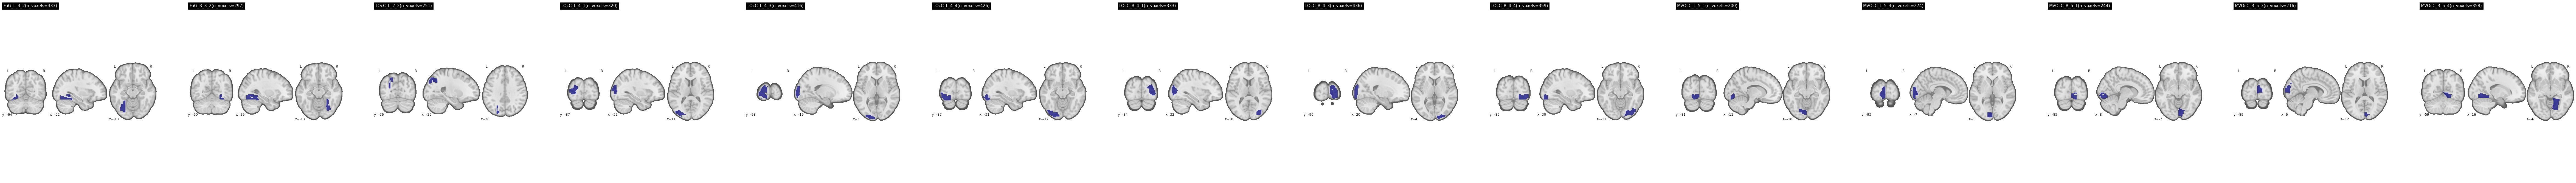

In [4]:
GA.plot_rois()

## *2. Calculation (run once)

In [8]:
for subj in GA.list_subj:
    for stage in GA.list_stage:
        GA.cross_valid(GA.load_beta(subj, stage))

In [9]:
## save the result as a pickle file
GA.save_as_pkl(path=GA.dir_script, data=GA.scores, suffix=suffix)

## 3. Loading a previous result

In [4]:
GA.show_pkl_list(path=GA.dir_script, word='decacc.%s'%suffix)

,name,identity
0,./20210721_decacc.DMN.pkl,a


In [5]:
# decacc = GA.load_from_pkl(fname='./20210721_decacc.%s.pkl'%suffix)

In [6]:
GA.make_df_score(fname='./20210721_decacc.%s.pkl'%suffix)

,subj,stage,ROI,mean_accuracy
0,01,early_practice,Core,0.350694
1,01,early_practice,dMsub,0.333333
2,01,early_practice,MTLsub,0.347222
3,01,early_practice,Core_PCC_r,0.371528
4,01,early_practice,Core_aMPFC_l,0.315972
...,...,...,...,...
2755,44,late_unpractice,MTLsub_vMPFC,0.305556
2756,44,late_unpractice,MTLsub_pIPL_l,0.291667
2757,44,late_unpractice,MTLsub_HF_l,0.295139
2758,44,late_unpractice,MTLsub_PHC_l,0.298611


## 4. Plotting the decoding accuracy

0

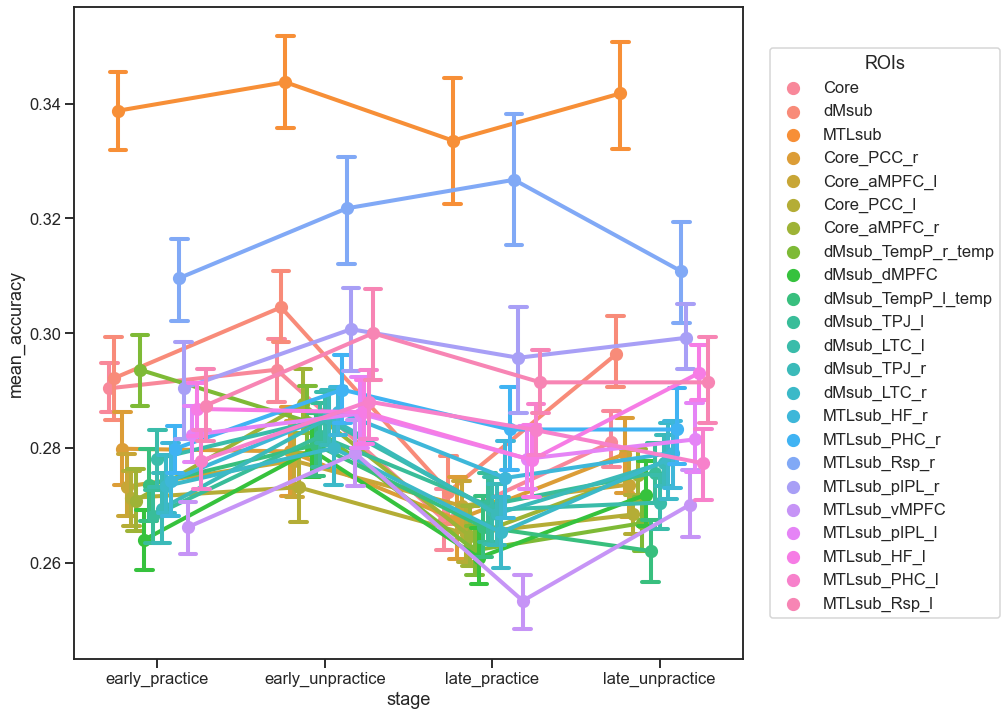

In [7]:
plt.figure(figsize=(12,12))
GA.plot_score(legend_outside=True)

0

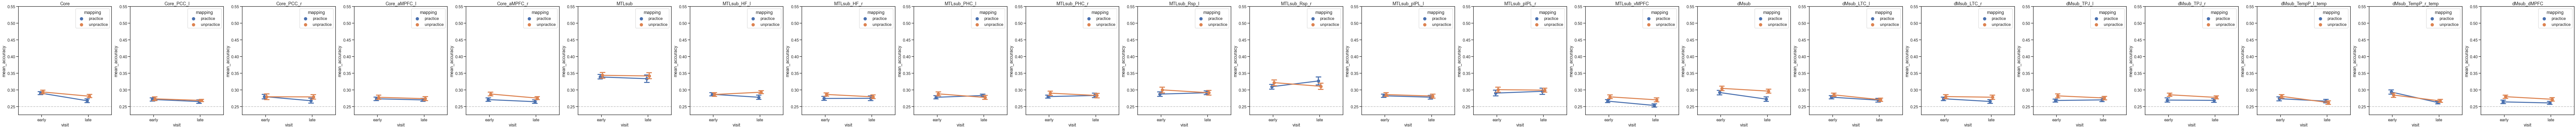

In [8]:
GA.plot_decacc(figsize=(8,8), ylim=(.225, .55), hline=.25)
# plt.savefig(join(GA.dir_git,'GA','images',"%s_decacc.%s.png"%(GA.today, suffix)))

0

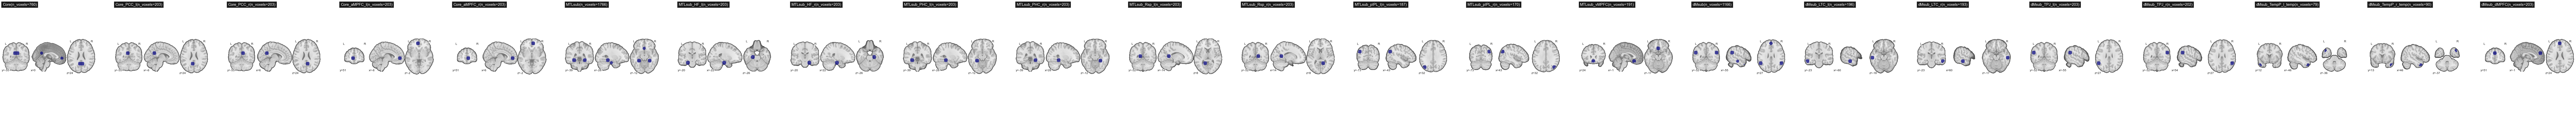

In [9]:
GA.plot_rois(figsize=(8,8))
# plt.savefig(join(GA.dir_git,'GA','images',"%s_rois.%s.png"%(GA.today, suffix)))

## 5. t-test

In [10]:
GA.do_paired_ttest(cond_A='early_practice', cond_B='late_practice', alpha=.005)

,ROI,cond_A,cond_B,tval,two-sided p-value,rejected,pval-corrected
0,Core,early_practice,late_practice,3.047261,0.004886,True,0.004886
1,dMsub,early_practice,late_practice,2.139986,0.040898,False,0.040898
2,MTLsub,early_practice,late_practice,0.412475,0.683024,False,0.683024
3,Core_PCC_r,early_practice,late_practice,1.304728,0.202245,False,0.202245
4,Core_aMPFC_l,early_practice,late_practice,0.494325,0.624801,False,0.624801
5,Core_PCC_l,early_practice,late_practice,0.887490,0.382117,False,0.382117
6,Core_aMPFC_r,early_practice,late_practice,0.985765,0.332402,False,0.332402
7,dMsub_TempP_r_temp,early_practice,late_practice,4.239094,0.000208,True,0.000208
8,dMsub_dMPFC,early_practice,late_practice,0.528320,0.601297,False,0.601297
9,dMsub_TempP_l_temp,early_practice,late_practice,0.882722,0.384646,False,0.384646


In [11]:
GA.do_paired_ttest(cond_A='early_unpractice', cond_B='late_unpractice', alpha=.005)

,ROI,cond_A,cond_B,tval,two-sided p-value,rejected,pval-corrected
0,Core,early_unpractice,late_unpractice,2.009214,0.053903,False,0.053903
1,dMsub,early_unpractice,late_unpractice,0.956079,0.346935,False,0.346935
2,MTLsub,early_unpractice,late_unpractice,0.202610,0.840854,False,0.840854
3,Core_PCC_r,early_unpractice,late_unpractice,0.054115,0.957214,False,0.957214
4,Core_aMPFC_l,early_unpractice,late_unpractice,0.477926,0.636286,False,0.636286
5,Core_PCC_l,early_unpractice,late_unpractice,0.706777,0.485346,False,0.485346
6,Core_aMPFC_r,early_unpractice,late_unpractice,1.876220,0.070723,False,0.070723
7,dMsub_TempP_r_temp,early_unpractice,late_unpractice,2.641657,0.013155,False,0.013155
8,dMsub_dMPFC,early_unpractice,late_unpractice,0.963191,0.343415,False,0.343415
9,dMsub_TempP_l_temp,early_unpractice,late_unpractice,2.401014,0.022986,False,0.022986


In [12]:
GA.do_1sample_ttest(stage='early_practice', mean=.25, alpha=.005)

,ROI,stage,tval,pval_uncorrected,rejected,pval_corrected
0,Core,early_practice,9.557470,1.824209e-10,True,1.824209e-10
1,dMsub,early_practice,5.784743,2.879420e-06,True,2.879420e-06
2,MTLsub,early_practice,12.597609,2.757169e-13,True,2.757169e-13
3,Core_PCC_r,early_practice,4.341874,1.570437e-04,True,1.570437e-04
4,Core_aMPFC_l,early_practice,4.303960,1.743049e-04,True,1.743049e-04
5,Core_PCC_l,early_practice,4.362740,1.482769e-04,True,1.482769e-04
6,Core_aMPFC_r,early_practice,3.927922,4.863837e-04,True,4.863837e-04
7,dMsub_TempP_r_temp,early_practice,6.640872,2.791293e-07,True,2.791293e-07
8,dMsub_dMPFC,early_practice,2.639808,1.321310e-02,False,1.321310e-02
9,dMsub_TempP_l_temp,early_practice,3.729146,8.302560e-04,True,8.302560e-04
